**CodSoft DataScience Internship**

**Task 3 - SALES PREDICTION USING PYTHON**

Sales prediction is an essential part of business strategy, allowing companies to understand future demand and make informed decisions. By analyzing factors such as advertising expenditure across TV, radio, and newspaper platforms, machine learning models can uncover patterns that influence customer purchasing behavior. In this project, we use Python and machine learning techniques to build predictive models that estimate sales based on advertising data. This helps businesses optimize their marketing budget, improve planning, and maximize profitability.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score



In [2]:
df = pd.read_csv("advertising.csv")
df.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [5]:
df.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,15.130500
std,85.854236,14.846809,21.778621,5.283892
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,11.000000
50%,149.750000,22.900000,25.750000,16.000000
75%,218.825000,36.525000,45.100000,19.050000
max,296.400000,49.600000,114.000000,27.000000


In [6]:
df.isna().sum()

,0
TV,0
Radio,0
Newspaper,0
Sales,0


In [7]:
X = df[['TV', 'Radio', 'Newspaper']]
y = df['Sales']

print("\nFeatures used:", X.columns.tolist())
print("Target:", 'Sales')




Features used: ['TV', 'Radio', 'Newspaper']
Target: Sales


In [8]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.20, random_state=42
)

In [9]:
lr = LinearRegression()
lr.fit(X_train, y_train)

y_pred_lr = lr.predict(X_test)

print("\n===== LINEAR REGRESSION RESULTS =====")
print("MAE :", mean_absolute_error(y_test, y_pred_lr))
print("MSE :", mean_squared_error(y_test, y_pred_lr))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_lr)))
print("R²   :", r2_score(y_test, y_pred_lr))


===== LINEAR REGRESSION RESULTS =====
MAE : 1.2748262109549338
MSE : 2.9077569102710896
RMSE: 1.7052146229349223
R²   : 0.9059011844150826


In [10]:
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

y_pred_rf = rf.predict(X_test)

print("\n===== RANDOM FOREST RESULTS =====")
print("MAE :", mean_absolute_error(y_test, y_pred_rf))
print("MSE :", mean_squared_error(y_test, y_pred_rf))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_rf)))
print("R²   :", r2_score(y_test, y_pred_rf))


===== RANDOM FOREST RESULTS =====
MAE : 0.9179999999999993
MSE : 1.4374328500000009
RMSE: 1.1989298770153327
R²   : 0.9534827934927883


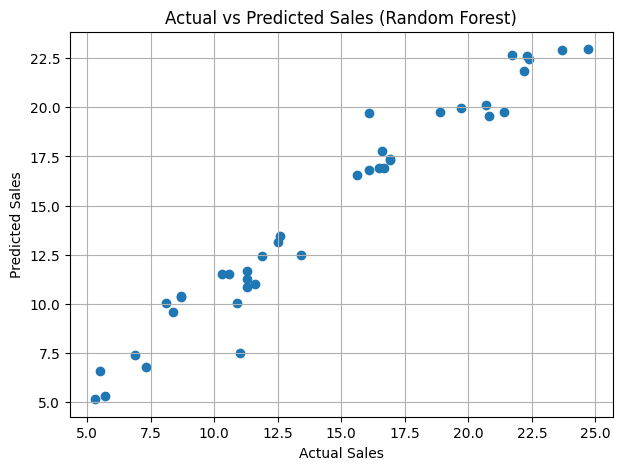

In [11]:
plt.figure(figsize=(7,5))
plt.scatter(y_test, y_pred_rf)
plt.xlabel("Actual Sales")
plt.ylabel("Predicted Sales")
plt.title("Actual vs Predicted Sales (Random Forest)")
plt.grid(True)
plt.show()


Feature Importance:
     Feature  Importance
0         TV    0.845355
1      Radio    0.136642
2  Newspaper    0.018003


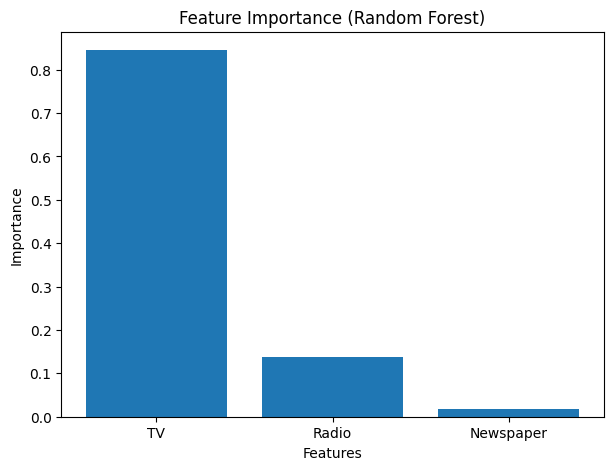

In [12]:
importances = rf.feature_importances_
feature_names = ['TV', 'Radio', 'Newspaper']

fi = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
fi = fi.sort_values(by='Importance', ascending=False)

print("\nFeature Importance:")
print(fi)

plt.figure(figsize=(7,5))
plt.bar(fi['Feature'], fi['Importance'])
plt.title("Feature Importance (Random Forest)")
plt.xlabel("Features")
plt.ylabel("Importance")
plt.show()

In this project, we developed machine learning models to predict sales using the Advertising dataset. Both Linear Regression and Random Forest were implemented, with Random Forest delivering higher accuracy. The results show that advertising on TV had the strongest impact on sales, followed by radio and newspaper. These insights enable businesses to focus on the most effective marketing channels and make data-driven decisions to enhance sales performance. Overall, the project demonstrates how machine learning can provide valuable guidance for strategic advertising investments.